# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [19]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [21]:
library(tidyverse)

In [22]:
wine <- read.csv("/content/wine.csv")
head(wine)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [23]:
glimpse(wine)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

In [24]:
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [25]:
scaled_wine <- wine |>
  mutate(across(-class, function(x) as.numeric(scale(x))))
scaled_wine

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


Based on the data displayed in the summary statistic table for wine, we need to scale and center the data due to the some variables having larger variances. Additionally, as a result of some variables having very big variances (ex: Proline in 1000s and Magnesium in 100s) while other variables had much smaller variances like Nonflavoid Phenols are sub 1 variances.

If we perform PCA without scaling, the relationships would be misrepresented with variables like Proline and Magnesium being determined as having a larger effect on the wine makeup than they actually do. By scaling and centering, when PCA is performed we can ensure the patterns revealed are actually based on the wine.


## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [26]:
# question 3a
pca_calc <- prcomp(scaled_wine, center = TRUE, scale. = TRUE)
pca_calc

Standard deviations (1, .., p=14):
 [1] 2.3528595 1.5802140 1.2025283 0.9632849 0.9367510 0.8202307 0.7441767
 [8] 0.5916369 0.5427172 0.5121583 0.4752351 0.4108488 0.3599502 0.2404419

Rotation (n x k) = (14 x 14):
                                       PC1          PC2          PC3
Alcohol                       -0.136325011 -0.484160868 -0.207400812
Malicacid                      0.222676383 -0.223590947  0.088796064
Ash                           -0.002257932 -0.315855884  0.626102363
Alcalinity_of_ash              0.224298489  0.011615737  0.611989600
Magnesium                     -0.124630159 -0.300551432  0.130984580
Total_phenols                 -0.359264042 -0.067119829  0.146507749
Flavanoids                    -0.390711715  0.001313454  0.150962746
Nonflavanoid_phenols           0.267001203 -0.026988703  0.169975512
Proanthocyanins               -0.279062504 -0.041222563  0.149879586
Color_intensity                0.089318293 -0.529782740 -0.137266298
Hue                      

In [27]:
# question 3b
summary(pca_calc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3529 1.5802 1.2025 0.96328 0.93675 0.82023 0.74418
Proportion of Variance 0.3954 0.1784 0.1033 0.06628 0.06268 0.04806 0.03956
Cumulative Proportion  0.3954 0.5738 0.6771 0.74336 0.80604 0.85409 0.89365
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.5916 0.54272 0.51216 0.47524 0.41085 0.35995 0.24044
Proportion of Variance 0.0250 0.02104 0.01874 0.01613 0.01206 0.00925 0.00413
Cumulative Proportion  0.9186 0.93969 0.95843 0.97456 0.98662 0.99587 1.00000

Question 3b) PC1 explains 39.5% of the total variance and PC2 explains 17.8% of the total variance as seen in the Proportion of Variance row. We were able to use the summary() function to visualize this info.


Question 3c) We need to do PCA first to reduce the dimensionality, handle multicollinearity, and improve visualizations. PCA improves classification and reduces noise.


In [28]:
# question 3d
pca_calc$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.136325011,-0.484160868,-0.207400812,-0.08191848,0.25089415,0.13517139,0.09269887,-0.42154435,-0.450190708,0.31127983,0.22154641,-0.26411262,-0.05610645,0.090626055
Malicacid,0.222676383,-0.223590947,0.088796064,0.46988824,0.18860015,0.59841948,-0.37436980,-0.08757556,-0.006025687,-0.32592413,-0.06839251,0.11921210,0.06675544,-0.025225306
Ash,-0.002257932,-0.315855884,0.626102363,-0.24984122,0.09352360,0.10799983,0.16708856,0.17208034,0.262494455,-0.12452347,0.49452428,-0.04502305,-0.19201787,-0.001635816
Alcalinity_of_ash,0.224298489,0.011615737,0.611989600,0.07199322,-0.04656750,-0.08811224,0.26872469,-0.41324857,-0.118633417,0.15716811,-0.47461722,-0.06131271,0.20007784,-0.095361066
Magnesium,-0.124630159,-0.300551432,0.130984580,-0.16321412,-0.77833048,0.14483831,-0.32957951,0.14881189,-0.252536278,0.12773363,-0.07119731,0.06116074,0.05829909,0.022300745
Total_phenols,-0.359264042,-0.067119829,0.146507749,0.19098521,0.14466563,-0.14809748,0.03789829,0.36343884,-0.406373544,-0.30772263,-0.29740957,-0.30087591,-0.35952714,-0.253037788
Flavanoids,-0.390711715,0.001313454,0.150962746,0.14461667,0.11200553,-0.06247252,0.06773223,0.17540500,-0.090919334,-0.14044000,0.03219187,-0.05001396,0.59834288,0.601909165
Nonflavanoid_phenols,0.267001203,-0.026988703,0.169975512,-0.32801272,0.43257916,-0.25868639,-0.61111195,0.23075135,-0.159122818,0.24054263,-0.12200984,0.04266558,0.06403952,0.082230935
Proanthocyanins,-0.279062504,-0.041222563,0.149879586,0.46275771,-0.09158820,-0.46627764,-0.42292282,-0.34373920,0.265786794,0.10869629,0.23292405,-0.09334264,-0.11013538,-0.058641979
Color_intensity,0.089318293,-0.529782740,-0.137266298,0.07211248,0.04626960,-0.42525454,0.18613617,0.04069617,-0.075264592,-0.21704255,-0.01972448,0.59795428,0.15917751,-0.178821145


Question 3d) The rotation matrix computed in 3d shows how the original variable contributed to each principal component.

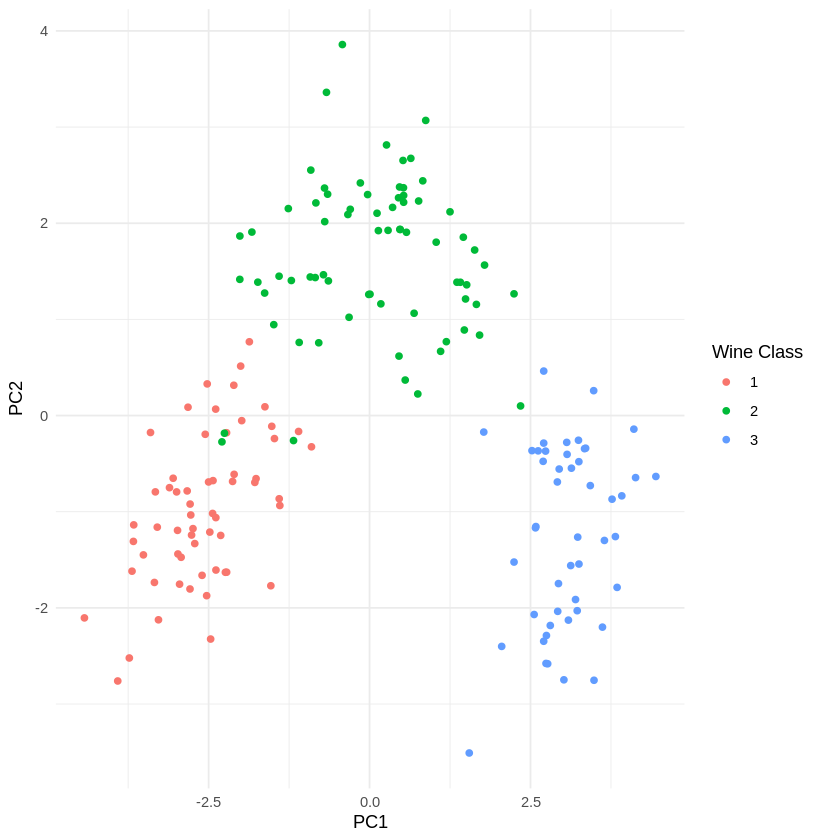

In [29]:
# question 3e
pca_data <- as.data.frame(pca_calc$x) |>
  mutate(class = scaled_wine$class)

ggplot(pca_data, mapping = aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point() +
    labs(color = "Wine Class") +
      theme_minimal()

Question 3f) When comparing PC1 and PC2 plots, we can see data points from the same wine classes are clustering together and forming distinct cluseters. However, there is still some overlapping regions. This means that the PCA was able to delineate key differences between wine classes based on its respective chemical features.


Question 3g) PCA may fail when the data does not have a linear structure as it struggles to find curved relationships. Specific examples include spirals, horseshoes, curved manifolds, spherical data and more as it is unable to use variance to properly understand data.


Question 3h) A vector space is a flat and linear space that preserves variance. A manifold is a curved surface that preserves local neighborhood structure. We can use t-SNE to better visualize the wine data due to its capability to understand non-linear structures. As mentioned in the lecture notes, it is often best to use a combination of PCA and t-SNE. PCA for pre-processing and dimensionality reduction and t-SNE for the actual visualization.



## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [30]:
# question 4a
#|warning = FALSE

pca_scoring <- as_tibble(pca_calc$x)

pca_scoring <- pca_scoring %>%
  mutate(class = scaled_wine$class)

pca_subset <- pca_scoring %>%
  select(PC1:PC10, class) %>%
  distinct()

set.seed(123)
tsne_rslt <- Rtsne(pca_subset %>% select(PC1:PC10), dims = 2)

tsne_tib <- as_tibble(tsne_rslt$Y) %>%
  setNames(c("Dim1", "Dim2")) %>%
  mutate(class = pca_subset$class)

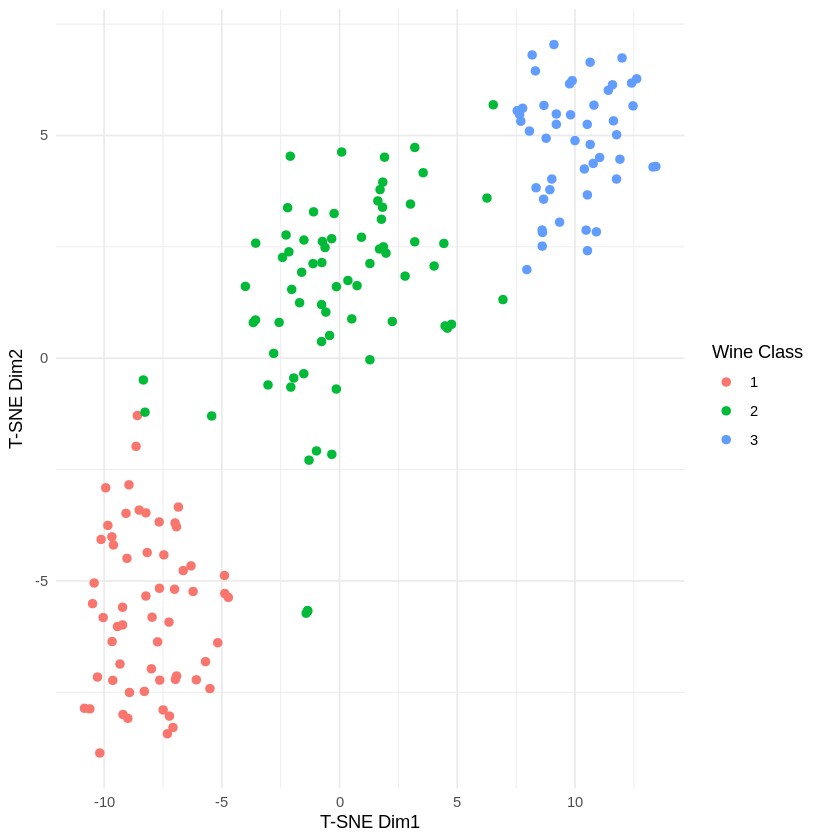

In [31]:
# question 4b

ggplot(tsne_tib, mapping = aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point(size = 2) +
  theme_minimal() +
    labs(color = "Wine Class", x = "T-SNE Dim1", y = "T-SNE Dim2")

Question 4c) We can not stop at performing PCA because PCA is a linear model. It does not tcapture the non-linear relationships that may be present in the wine data. T-SNE allows us to visualize the clusters as seen in the graph from 4b.


Question 4d)
This workflow also makes sense for high-dimensional datasets (ex. image feature embeddings). It would work for anything that needs dimensionality reduction prior to visualization.